# Plotting about Shapiro-Wilk tests

Uncomment to save plots.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',size=14)

### Proportion of rejected Shapiro-Wilk tests

In [2]:
ns = [1000,2000,5000,10000]
# ns = [2500,5000,10000]
Ns = [10000,25000,50000,100000,1000000,10000000]
Ls = [1.0,2.0,3.0,4.0]
alphas = ['alpha=0.1','alpha=0.05','alpha=0.01']
datadic = dict()
datadic['n'] = []
datadic['N'] = []
datadic['L'] = []
datadic['alpha'] = []
datadic['prop'] = []
for n in ns:
    for N in Ns:
        for L in Ls:
            for alpha in alphas:
                try:
                    filein = '../data/shapiro/shapiro-n' + str(n) + '-N' + str(N) + '-cM' + str(L) + '.tsv'
                    table = pd.read_csv(filein, sep='\t')
                    datadic['n'].append(n)
                    datadic['N'].append(int(N/1000))
                    datadic['L'].append(L/100)
                    datadic['alpha'].append(alpha)
                    datadic['prop'].append(table[alpha].mean())
                except:
                    pass


In [3]:
df = pd.DataFrame(datadic)
df.head()

,n,N,L,alpha,prop
0,1000,10,0.01,alpha=0.1,0.994
1,1000,10,0.01,alpha=0.05,0.984
2,1000,10,0.01,alpha=0.01,0.938
3,1000,10,0.02,alpha=0.1,0.912
4,1000,10,0.02,alpha=0.05,0.858


#### Fixed sample size, varying population size

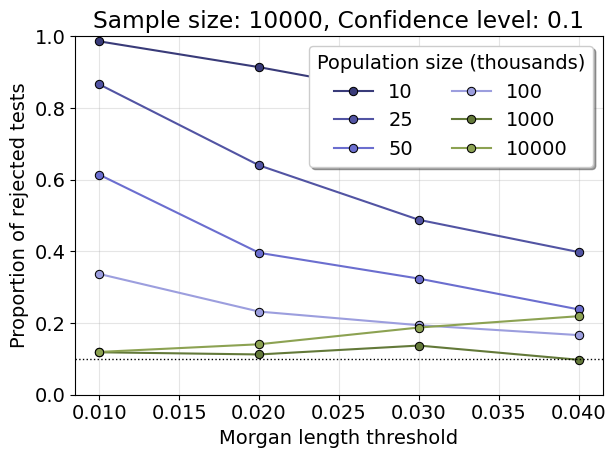

In [17]:
# fixed

n = 10000
palette='tab20b'
a = str(0.1)
alpha = 'alpha=' + a

fileout = 'v2-pop-by-size' + str(n) + '-' + alpha 
# fileout = 'size-by-pop' + str(n) + '-' + alpha

sub = df[(df['n']==n) & (df['alpha']==alpha)]
sns.lineplot(sub,
             x='L',
             y='prop',
             hue='N',
             palette=palette,
             marker='o',
             markeredgecolor='k'
            )
plt.ylim(-0,1)
plt.xlabel('Morgan length threshold')
plt.ylabel('Proportion of rejected tests')
plt.title('Sample size: ' + str(n) + ', Confidence level: ' + a)
plt.legend(title='Population size (thousands)',
           loc='upper right',
           ncol=2,
           shadow=True
          )
plt.axhline(float(a),color='k',linewidth=1,linestyle='dotted')
plt.grid(alpha=0.33)
plt.tight_layout()
# plt.savefig(fileout + '.tiff')
# plt.savefig(fileout + '.png')

#### Fixed population size, varying sample size

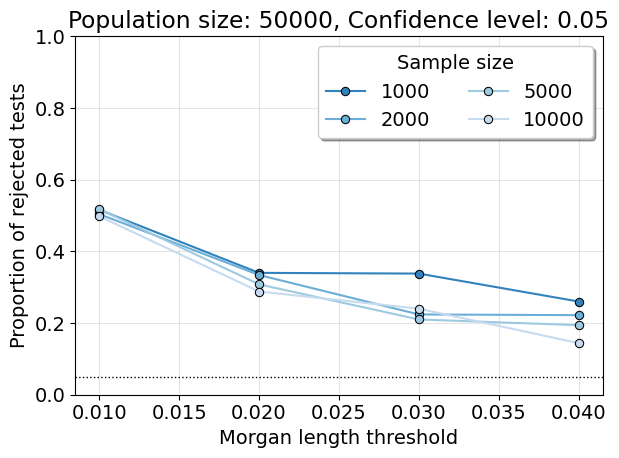

In [28]:
# fixed

N = 50000
palette='tab20c'
a = str(0.05)
alpha = 'alpha=' + a

fileout = 'v2-size-by-pop' + str(N) + '-' + alpha

sub = df[(df['N']==(N/1000)) & (df['alpha']==alpha)]
sns.lineplot(sub,
             x='L',
             y='prop',
             hue='n',
             palette=palette,
             marker='o',
             markeredgecolor='k'
            )
plt.ylim(-0,1)
plt.xlabel('Morgan length threshold')
plt.ylabel('Proportion of rejected tests')
plt.title('Population size: ' + str(N) + ', Confidence level: ' + a)
plt.legend(title='Sample size',
           loc='upper right',
           ncol=2,
           shadow=True
          )
plt.tight_layout()
plt.axhline(float(a),color='k',linewidth=1,linestyle='dotted')
plt.grid(alpha=0.33)
# plt.savefig(fileout + '.tiff')
# plt.savefig(fileout + '.png')

### Interval widths

How large is the confidence interval width assuming normality versus the percentile approach?

In [30]:
from scipy.stats import norm

alpha = 0.05
beta = 1 - alpha / 2
zquantile = norm.ppf(beta)
ns = [1000,2000,2500,5000,10000]
Ns = [10000,25000,50000,100000,1000000,10000000]
Ls = [1.0,2.0,3.0,4.0]

datadic2 = dict()
datadic2['n'] = []
datadic2['N'] = []
datadic2['L'] = []
datadic2['true_width'] = []
datadic2['estimated_width'] = []
datadic2['relative_width'] = []

for n in ns:
    for N in Ns:
        for L in Ls:
            try:
                m = 2 * n
                M = m * (m - 1) / 2
                filein = '../data/shapiro/shapiro-n' + str(n) + '-N' + str(N) + '-cM' + str(L) + '.tsv'
                table = pd.read_csv(filein, sep='\t')
                table['leftestimate'] = table['mean'] - zquantile * table['stddev']
                table['rightestimate'] = table['mean'] + zquantile * table['stddev']
                # consistent_estimate = table['mean'].mean() / M
                # consistent_stddev = table['stddev'].mean()
                # consistent_var = M * consistent_estimate * (1 - consistent_estimate)
                # consistent_stddev = consistent_var ** 0.5
                # table['covered'] = (table['left'] <= consistent_estimate) & (table['right'] >= consistent_estimate)
                # true_width = 2 * zquantile * consistent_stddev
                estimated_widths = (table['rightestimate'] - table['leftestimate'])
                true_widths = (table['rightend'] - table['leftend'])
                relative_widths = estimated_widths / true_widths
                relative_width = relative_widths.mean()
                estimated_width = estimated_widths.mean()
                true_width = true_widths.mean()
                datadic2['n'].append(n)
                datadic2['N'].append(N)
                datadic2['L'].append(L)
                datadic2['true_width'].append(true_widths.mean())
                datadic2['estimated_width'].append(estimated_width)
                datadic2['relative_width'].append(relative_width)
                # datadic2['log2_relative_width'].append(float(np.log2(relative_width)))
                # datadic2['coverage'].append(table['covered'].mean())
            except:
                pass
df2 = pd.DataFrame(datadic2)
df2.head()

,n,N,L,true_width,estimated_width,relative_width
0,1000,10000,1.0,3094.28820,3130.100396,1.012450
1,1000,10000,2.0,1229.34905,1239.415490,1.009073
2,1000,10000,3.0,735.34115,739.906804,1.007097
3,1000,10000,4.0,521.18000,524.926006,1.008006
4,1000,25000,1.0,927.45375,936.377234,1.010537


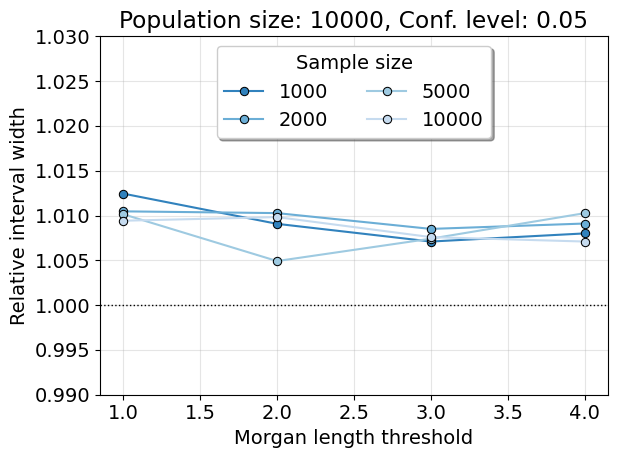

In [40]:
# fixed

N = 10000
palette='tab20c'

fileout = 'v2-size-by-pop' + str(N) + '-width'

sub = df2[df2['N']==(N)]
sns.lineplot(sub,
             x='L',
             y='relative_width',
             hue='n',
             palette=palette,
             marker='o',
             markeredgecolor='k'
            )
plt.ylim(0.99,1.03)
plt.xlabel('Morgan length threshold')
plt.ylabel('Relative interval width')
plt.title('Population size: ' + str(N) + ', Conf. level: ' + str(alpha))
plt.legend(title='Sample size',
           loc='upper center',
           ncol=2,
           shadow=True
          )
plt.axhline(float(1.0),color='k',linewidth=1,linestyle='dotted')
plt.grid(alpha=0.33)
plt.tight_layout()
# plt.savefig(fileout + '.tiff')
# plt.savefig(fileout + '.png')

### Complex demography

In [25]:
ns = [5000,10000]
Ns = ['three-phase-2000G.ne','bottleneck-1000G.ne']
Ls = [1,2,3,4]
alphas = ['alpha=0.1','alpha=0.05','alpha=0.01']
datadic = dict()
datadic['n'] = []
datadic['N'] = []
datadic['L'] = []
datadic['alpha'] = []
datadic['prop'] = []
for n in ns:
    for N in Ns:
        for L in Ls:
            for alpha in alphas:
                try:
                    filein = '../data/shapiro/shap-edges-together-N-' + str(N) + '-n' + str(n) + '-L' + str(L) + '.tsv'
                    table = pd.read_csv(filein, sep='\t')
                    datadic['n'].append(n)
                    datadic['N'].append(N)
                    datadic['L'].append(L/100)
                    datadic['alpha'].append(alpha)
                    datadic['prop'].append(table[alpha].mean())
                except:
                    pass


In [26]:
df3 = pd.DataFrame(datadic)
df3

,n,N,L,alpha,prop
0,5000,three-phase-2000G.ne,0.01,alpha=0.1,1.000000
1,5000,three-phase-2000G.ne,0.01,alpha=0.05,1.000000
2,5000,three-phase-2000G.ne,0.01,alpha=0.01,0.997976
3,5000,three-phase-2000G.ne,0.02,alpha=0.1,0.728972
4,5000,three-phase-2000G.ne,0.02,alpha=0.05,0.637072
5,5000,three-phase-2000G.ne,0.02,alpha=0.01,0.414330
6,5000,three-phase-2000G.ne,0.03,alpha=0.1,0.419003
7,5000,three-phase-2000G.ne,0.03,alpha=0.05,0.291277
8,5000,three-phase-2000G.ne,0.03,alpha=0.01,0.146417
9,5000,three-phase-2000G.ne,0.04,alpha=0.1,0.334862


In [40]:
Nname = df3['N'].to_list()
nick = ['BN' if Nn == 'bottleneck-1000G.ne' else 'G3' for Nn in Nname]

df3['nickname'] = nick
# df3[df3['N']=='three-phase-2000G.ne']['nickname'] = 'G3'
df3['legend'] = df3['nickname'] + '-' + df3['n'].astype(str)
df3.sort_values('legend',inplace=True)

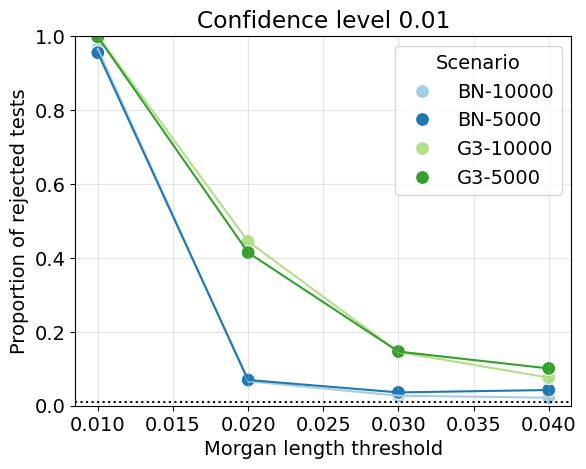

In [49]:
subtable = df3[df3['alpha']=='alpha=0.01']
# subtable2 = subtable[subtable['n']==5000]

sns.lineplot(subtable,
                x='L',
                y='prop',
                hue='legend',
             palette='Paired',
             legend=False
               )

# plt.legend().remove()

sns.scatterplot(subtable,
                x='L',
                y='prop',
                hue='legend',
                palette='Paired',
                s=100
               )

plt.axhline(0.01,color='k',linestyle='dotted')
plt.grid(alpha=0.33)
plt.ylim(0,1)

plt.legend(title='Scenario')

plt.ylabel('Proportion of rejected tests')
plt.xlabel('Morgan length threshold')

plt.title('Confidence level 0.01')

# plt.savefig('shapiro-complex-demography-alpha1.png')
# plt.savefig('shapiro-complex-demography-alpha1.tiff')